# Sentiment Analysis

TikTok is a short-form video hosting service. This application has revolutionized the way we watch short videos. Those who enjoy entertaining and funny short videos are likely already familiar with this app. However, not everyone is interested in it. Some praise it, while others criticize it. The main objective of doing sentiment analysis on the TikTok app is:
- To determine whether users like or dislike the app based on their comments.
- To provide feedback to the developers of the app, including any issues they may have encountered while using it.
- For the developers to utilize it to improve the application’s functionality, solve problems, and respond to user concerns.
- For business to adjust their marketing strategy on TikTok.

## Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
import plotly.express as px

[nltk_data] Downloading package stopwords to C:\Users\Nafi
[nltk_data]     Kareem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


WordCloud is a library used to create text visualizations based on the number of times the words appear in them so it’s easy to understand.

STOPWORDS is a library used to remove unimportant words from documents or text, such as prepositions and conjunctions. The main goal in implementing the stop words process is to reduce the number of words in a document, which will affect the speed and performance of NLP (natural language processing).

ImageColorGenerator is a library that generates colors using images relevant to the text’s topic.

The SentimentIntensityAnalyzer is a library that analyzes sentiment in text. This library uses a score to determine if the text being analyzed falls into the positive, negative, or neutral category.

## Read The Data

In [2]:
df = pd.read_csv('tiktok_reviews.csv')
df.head()

C:\Users\Nafi Kareem\AppData\Local\Temp\ipykernel_22468\1170678877.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tiktok_reviews.csv')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


## Data Preprocessing

I will use some of the initialized libraries at this point. Preprocessing techniques include removing unwanted characters, such as punctuation, and converting all the text to lowercase to make the analysis process easier. 

Another important step in data preprocessing is removing stop words, which are common words that are not essential in determining the sentiment of a text. Stop words can include words like “the,” “is,” and “and.” Removing these words can help reduce noise and improve the accuracy of the sentiment analysis.

Other preprocessing techniques include tokenization, which involves breaking up the text into individual words or phrases, and stemming or lemmatization, which involves reducing words to their base form to account for spelling and word usage variations.

here I will not use all of the dataset columns. Only two columns will be used: content and score. Therefore, i will create a new dataset containing only two columns.

In [3]:
data = df[['content', 'score']]
data.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


check whether the two columns we use to analyze TikTok review sentiment have null values or not.

In [4]:
data.isna().sum()

content    16
score       0
dtype: int64

In [5]:
data.dropna(inplace=True)

C:\Users\Nafi Kareem\AppData\Local\Temp\ipykernel_22468\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [6]:
data.isna().sum()

content    0
score      0
dtype: int64

prepare this data for the sentiment analysis task. Here, we need to clean up the text in the content column to ensure accurate analysis.

In [7]:
stopword=set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["content"] = data["content"].apply(clean)

C:\Users\Nafi Kareem\AppData\Local\Temp\ipykernel_22468\3163525519.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["content"] = data["content"].apply(clean)


## Exploratory Data Analysis

### Ratings

explore the percentage of ratings given to TikTok on the Google Play Store!

In [9]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

in the graph above it can be concluded TikTok has garnered an impressive 74% of five-star ratings from users, with only 12.9% giving it a one-star rating.

### Words the Users Use in the Reviews

kind of words the users use in the reviews of TikTok

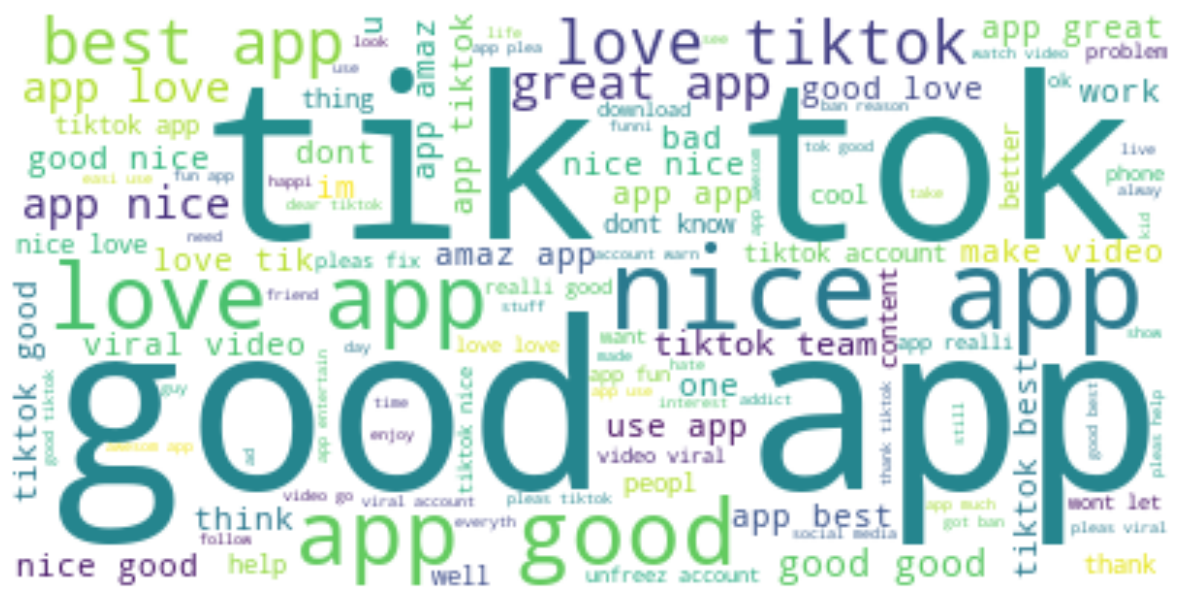

In [11]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analalysis

Firstly, we’ll transform the score column into three new columns: Positive, Negative, and Neutral, based on the sentiment score of each user review. This is done in order to acquire a thorough grasp of the review. 

In [12]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Nafi
[nltk_data]     Kareem\AppData\Roaming\nltk_data...
C:\Users\Nafi Kareem\AppData\Local\Temp\ipykernel_22468\3699756414.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nafi Kareem\AppData\Local\Temp\ipykernel_22468\3699756414.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


C:\Users\Nafi Kareem\AppData\Local\Temp\ipykernel_22468\3699756414.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Positive Reviews Words

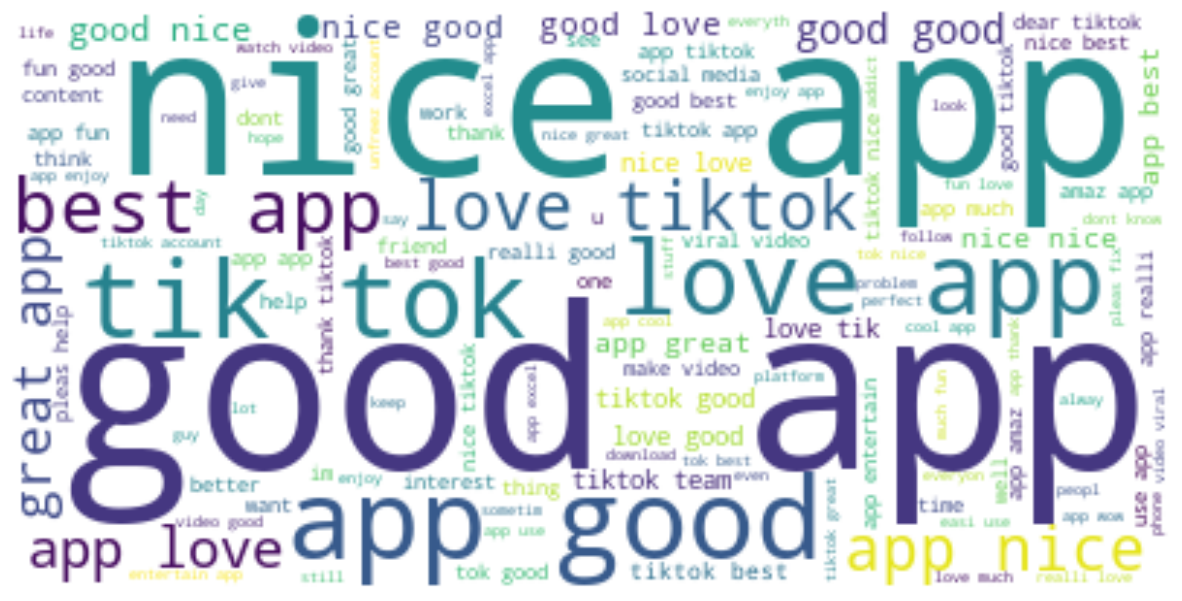

In [13]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative Reviews Words

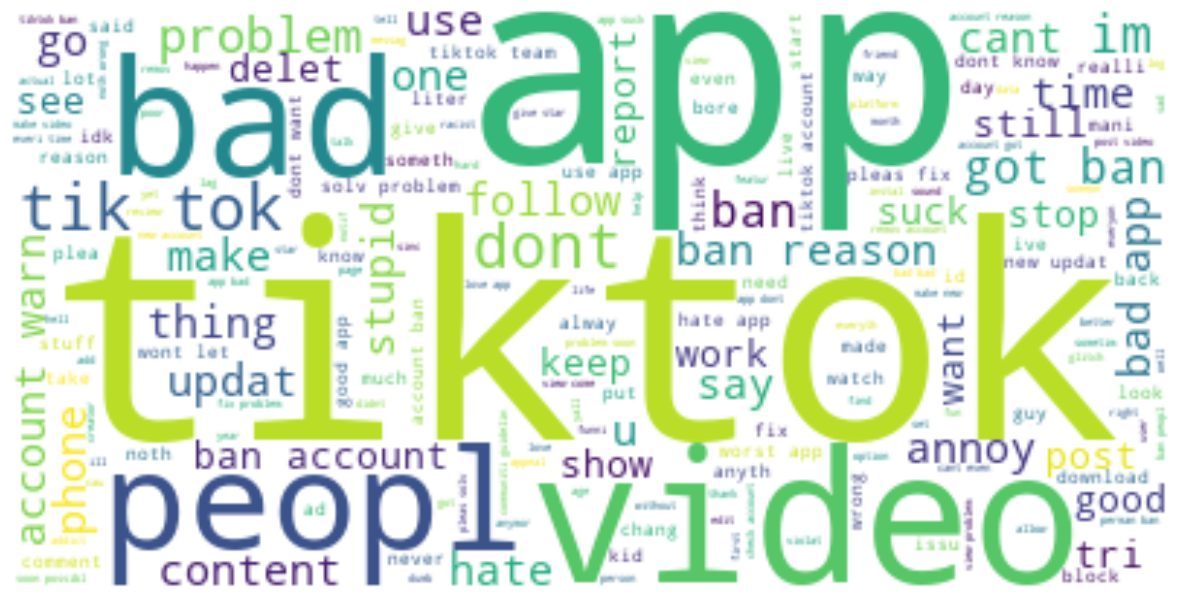

In [14]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusion

So this is how to analyze the sentiments of the TikTok reviews. TikTok is famous for its short videos. People often use this app to watch entertaining and funny videos. Despite its entertaining content, this application is not liked by everyone.